In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\linds\Documents\git\loan_history_almost_clean.csv")
df.head(5)

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,B,2.0,0,19200.0,24
1,1,6500,A,2.0,1,66000.0,28
2,0,2400,A,2.0,0,60000.0,36
3,0,10000,C,3.0,0,62000.0,24
4,1,4000,C,2.0,0,20000.0,28


In [4]:
len(df)

7727

In [5]:
#Check for Null values
df.isnull().values.any()

True

In [6]:
# WHat columns have null values?
df.isnull().sum()

default              0
amount_of_loan       0
credit_rating        0
years_with_bank      1
rent_mortgage_own    0
income               0
age                  0
dtype: int64

In [7]:
# With only one null, it can be dropped
df = df.dropna()

In [8]:
len(df)

7726

## Data must be converted to numerical, mapping will be used in this instance

In [9]:
# map credit rating to a number
int_credit_rating = {"credit_rating": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 5, "G": 5}}
df = df.replace(int_credit_rating)
df.head()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,2,2.0,0,19200.0,24
1,1,6500,1,2.0,1,66000.0,28
2,0,2400,1,2.0,0,60000.0,36
3,0,10000,3,3.0,0,62000.0,24
4,1,4000,3,2.0,0,20000.0,28


### Logistic Regression

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('default', axis=1), df['default'], test_size=0.2, random_state=42)

# Create a logistic regression model with L1 regularization
lr_model = LogisticRegression(penalty='l1', solver='liblinear')

param_grid = {'C': [0.1, 1, 10, 100],
              'class_weight': [None, 'balanced'],
              'max_iter': [100, 500, 1000]}

# Perform grid search using 5-fold cross-validation
lr_grid = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
lr_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding test accuracy
print("Best hyperparameters: ", lr_grid.best_params_)
print("Test accuracy: ", lr_grid.score(X_test, y_test))

Best hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}
Test accuracy:  0.6319534282018111


In [11]:
# Fit the model on the training set
lr_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = lr_model.predict(X_test)

# Calculate the test accuracy
accuracy = lr_model.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# display the confusion matrix
#
# TP FP
# FN TN
cm = confusion_matrix(y_test, y_pred)
print(cm)

Test accuracy: 0.62
[[589 210]
 [376 371]]


<Axes: >

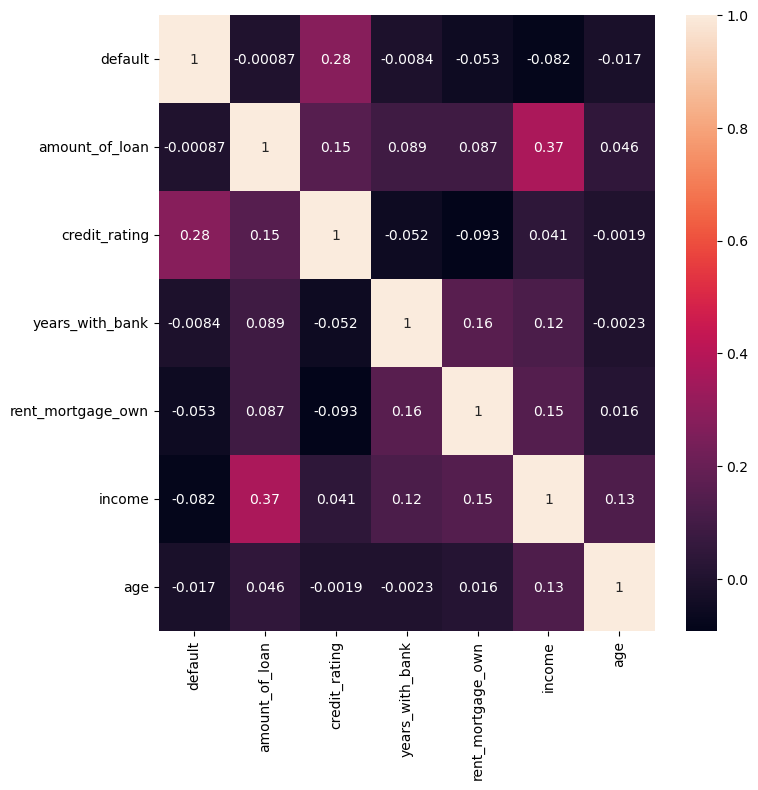

In [12]:
#Correlation Matrix
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

## Not great accuracy, can another model do better?

In [13]:
# Setting up multiple regression moels
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# vanilla linear regression
from sklearn.linear_model import LinearRegression
# decision tree
from sklearn.tree import DecisionTreeRegressor
# random forest
from sklearn.ensemble import RandomForestRegressor
# gradient boost
from sklearn.ensemble import GradientBoostingRegressor
# elastic net
from sklearn.linear_model import ElasticNet
# stochastic gradient descent regression
from sklearn.linear_model import SGDRegressor
# support vector machine
from sklearn.svm import SVR
# bayesian ridge regression
from sklearn.linear_model import BayesianRidge
# kernel ridge
from sklearn.kernel_ridge import KernelRidge
# xgboost
#from xgboost.sklearn import XGBRegressor
# LGBM
#from lightgbm import LGBMRegressor

# measuring how we do 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaler
from sklearn.preprocessing import StandardScaler

In [14]:
# Define the input features and target variable
X = df[['amount_of_loan', 'credit_rating', 'years_with_bank', 'rent_mortgage_own', 'income', 'age']]
y = df['default']

In [15]:
# create a list of regression models to try
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(),
ElasticNet(), SGDRegressor(), SVR(), BayesianRidge(), KernelRidge()]
models

[LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 ElasticNet(),
 SGDRegressor(),
 SVR(),
 BayesianRidge(),
 KernelRidge()]

In [16]:
print(X_train.shape)
print(X_test.shape)

(6180, 6)
(1546, 6)


In [17]:
# loop through each model and train on the same training data
print('We want low MSE and MAE and an R-squared as close to 1 as possible')
for model in models:
    print('\n'+ type(model).__name__)
    model.fit(X_train, y_train.ravel())

    # make prediction on test set
    y_pred = model.predict(X_test)
    
    # report effectiveness of model
    # use MSE, MAE and R-2
    # (no confusion matrix, because we are predicting in a range and not classifying to a set)
    print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))
    print('MAE: {0:.4f}'.format(mean_absolute_error(y_test, y_pred)))
    print('R-squared: {0:.4f}'.format(r2_score(y_test, y_pred)))

We want low MSE and MAE and an R-squared as close to 1 as possible

LinearRegression
MSE: 0.2329
MAE: 0.4596
R-squared: 0.0675

DecisionTreeRegressor
MSE: 0.4004
MAE: 0.4004
R-squared: -0.6034

RandomForestRegressor
MSE: 0.2160
MAE: 0.4122
R-squared: 0.1352

GradientBoostingRegressor
MSE: 0.2249
MAE: 0.4454
R-squared: 0.0992

ElasticNet
MSE: 0.2487
MAE: 0.4957
R-squared: 0.0043

SGDRegressor
MSE: 228647736299054739581394334152392704.0000
MAE: 331745404893801792.0000
R-squared: -915626817477924255826278765597556736.0000

SVR
MSE: 0.2940
MAE: 0.4575
R-squared: -0.1772

BayesianRidge
MSE: 0.2328
MAE: 0.4600
R-squared: 0.0677

KernelRidge
MSE: 0.2362
MAE: 0.4560
R-squared: 0.0542


## Random Forest Regressor is displaying the best results, exploring further

In [18]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
# Define the model
forest = RandomForestClassifier()

In [19]:
#Train the model
forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Evaluate the model
forest_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')

In [21]:
# Print the score
print('Random Forest scores:', forest_scores.mean())

Random Forest scores: 0.6517799352750809


## It's not great accuracy, but cross validation can be done

In [22]:
# Define the forest parameter grid search
forest_param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

In [23]:
#Find best hyperparameters, 5 folds
forest_grid = GridSearchCV(forest, forest_param_grid, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
# Display best parameters and score
print('Best hyperparameters:', forest_grid.best_params_)
print('Best score:', forest_grid.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.6614886731391586


In [25]:
# Get the feature importances
importances = forest.feature_importances_

# Create a list of feature names
feature_names = ['amount_of_loan', 'credit_rating', 'years_with_bank', 'rent_mortgage_own', 'income', 'age']

# Print the feature importances
for feature_name, importance in zip(feature_names, importances):
    print(f'{feature_name}: {importance:.3f}')

amount_of_loan: 0.234
credit_rating: 0.111
years_with_bank: 0.172
rent_mortgage_own: 0.039
income: 0.276
age: 0.168


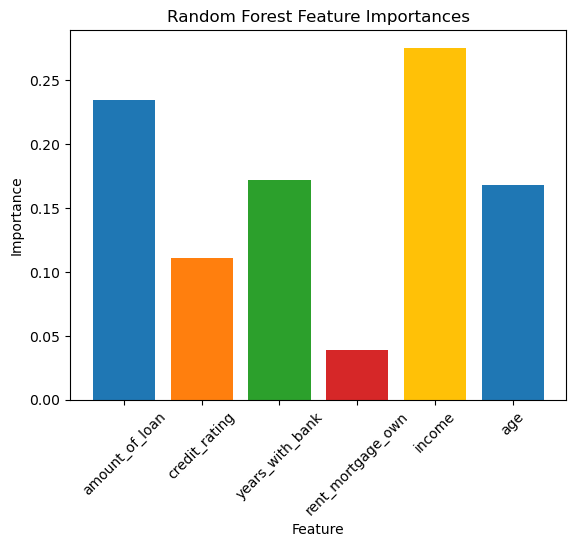

In [29]:
# Create a bar chart of feature importances with different colors for each feature
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#ffc107']
plt.bar(feature_names, importances, color=colors)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()